In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/textdb3/fake_or_real_news.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
news_df=pd.read_csv('/kaggle/input/textdb3/fake_or_real_news.csv')

In [4]:
news_df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
news_df.tail()

,Unnamed: 0,title,text,label
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


In [7]:
news_df.shape

(6335, 4)

In [14]:
news=news_df.label
news.value_counts()
news

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

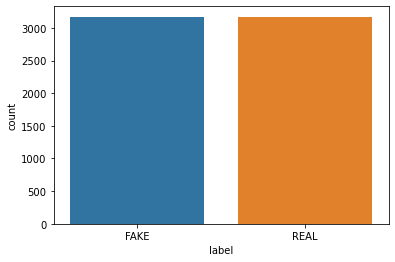

In [13]:
sns.countplot(news_df['label'])

In [23]:
x_train,x_test,y_train,y_test=train_test_split(news_df['text'], news, test_size=0.2, random_state=7)

In [24]:
tfidf=TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train=tfidf.fit_transform(x_train) 
tfidf_test=tfidf.transform(x_test)

In [26]:
tfidf_train.shape

(5068, 61651)

In [27]:
tfidf_test.shape

(1267, 61651)

In [40]:
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
pac_acc=round(score*100,2)
print(f'Accuracy: {pac_acc}%')

Accuracy: 92.66%


In [36]:
from sklearn.tree import DecisionTreeClassifier
dec=DecisionTreeClassifier()
dec.fit(tfidf_train,y_train)
y_pred2=dec.predict(tfidf_test)
score2=accuracy_score(y_test,y_pred2)
dec_acc=round(score2*100,2)
print(f'Accuracy: {dec_acc}%')

Accuracy: 79.56%


In [35]:
from sklearn.ensemble import RandomForestClassifier
ran=RandomForestClassifier()
ran.fit(tfidf_train,y_train)
y_pred3=ran.predict(tfidf_test)
score3=accuracy_score(y_test,y_pred3)
ran_acc=round(score3*100,2)
print(f'Accuracy: {ran_acc}%')

Accuracy: 89.9%


In [41]:
labels={'PassiveAggressiveClassifier':pac_acc,'DecisionTreeClassifier':dec_acc,'RandomForestClassifier':ran_acc}
for model,accuracy in labels.items():
    print(str(model)+' : '+str(accuracy))

PassiveAggressiveClassifier : 92.66
DecisionTreeClassifier : 79.56
RandomForestClassifier : 89.9


<BarContainer object of 3 artists>

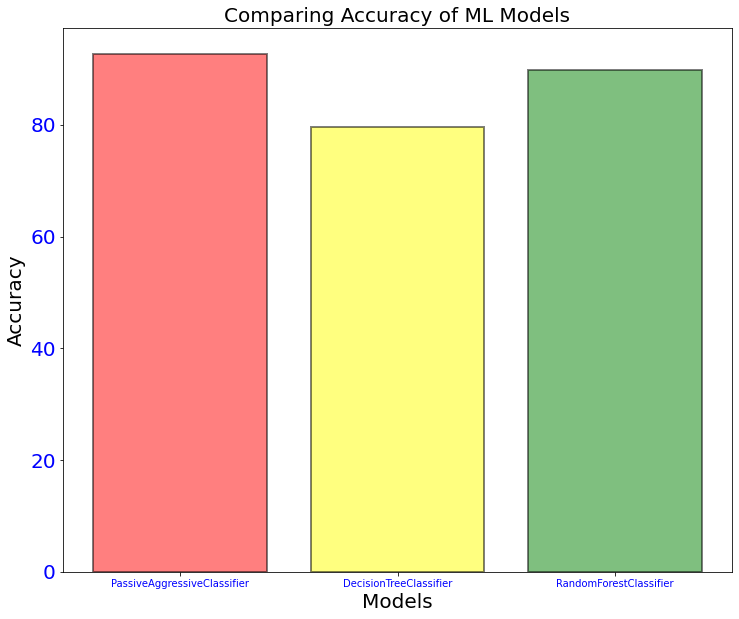

In [42]:
plt.figure(figsize=(10,8))
plt.title('Comparing Accuracy of ML Models',fontsize=20)
colors=['red','yellow','green']
plt.xticks(fontsize=10,color='blue')
plt.yticks(fontsize=20,color='blue')
plt.ylabel('Accuracy',fontsize=20)
plt.xlabel('Models',fontsize=20)
plt.bar(labels.keys(),labels.values(),edgecolor='black',color=colors, linewidth=2,alpha=0.5)

In [46]:
pac_con=confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
print("Confusion Matrix for PassiveAgressiveClassifier",end="\n")
print(pac_con)

Confusion Matrix for PassiveAgressiveClassifier
[[585  53]
 [ 40 589]]


In [47]:
dec_con=confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
print("Confusion Matrix for DecisionTreeClassifier",end="\n")
print(dec_con)

Confusion Matrix for DecisionTreeClassifier
[[585  53]
 [ 40 589]]


In [48]:
ran_con=confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
print("Confusion Matrix for DecisionTreeClassifier",end="\n")
print(ran_con)

Confusion Matrix for DecisionTreeClassifier
[[585  53]
 [ 40 589]]
